## ESDA and house price predicticion with Machine learning models and evaluations

### NCG613: Data Analytics Project 


## Part 1: Introduction and research question！ 

The London housing market is one of the complex and dynamic system that is influenced by numerous factors. The city's popularity as a global hub for business and culture has driven demand for property, which is characterized by high levels of volatility, with prices fluctuating rapidly in response to changes in economic conditions, government policies, and local market conditions. As such, predicting housing prices accurately can be a challenging task.  As one of the most important economic indicators to assess the overall health of an economy, understanding the spatial patterns and drivers of housing prices is critical for policymakers, investors, and individuals. 


Spatial analysis is an essential tool in investigating the relationships between spatial features and variables of interest. It is widely used in fields such as urban planning, environmental science, and epidemiology. Given London's status as one of the world's most sought-after locations, understanding the geographic distribution of house prices and the factors that affect them is critical. Spatial analysis can reveal patterns and relationships that may not be visible through traditional statistical methods, which is vital for our project. 


In addition to spatial analysis, machine learning models can also provide valuable insights into the London housing market. By leveraging the power of algorithms and statistical models, these techniques can be used to predict future housing prices and identify key drivers of price fluctuations. This information can be used by investors and policymakers to make informed decisions about real estate investments and policy interventions. Overall, the combination of spatial analysis and machine learning can provide a powerful toolkit for analyzing the complex and dynamic London housing market. The machine learning models we have chosen in this project include Gradient Boosting Regressor (GB), Random Forest, K Nearest Neighbors (KNN), and Lasso.


Our project aims to provide valuable insights into the current state of the London housing market by utilizing machine learning models and spatial analysis techniques. Specifically, we will be implementing four machine learning models and evaluating their performance to choose the best model for predicting house prices across the London boroughs. We will also perform spatial analysis using Exploratory Spatial Data Analysis (ESDA), including spatial autocorrelation, to better understand the patterns and relationships within the data. Furthermore, we will also perform a time series visualization to gain deeper understanding of the changes in house prices over time. In general, we hope to contribute to the existing literature by providing a comprehensive analysis of house prices across different London boroughs.


The main analysis part is organized as follows. In 3.1-3.2 we perform data manipulation, preparation to conduct an exploratory analysis. This includes generating choropleth maps to visualize price trends and other important feature values. In section 3.3, we will conduct spatial autocorrelation analysis and visualization, including global and local measures. Spatial autocorrelation is a statistical technique that measures the degree to which data values are correlated based on their spatial weights. In 3.4, we have Point Pattern Analysis through Interactive Points clustering mapping. In 3.5, we focus on Machine learning, fits, evaluate and compare 4 machine learning models. Finally, we wrap up our project with conclusion. 



#  Part 2: Data and methods.

__Data Processing:__ <br/>
The data we employed for this project included house price data, socio-economic data, and borough boundary data for London. The primary data source is London House Price Data, which can be downloaded from Price Paid Data (PPD). 

We implement the project analysis in Python language for all data manipulation, geo-visualization, geospatial feature engineering and machine learning. Many libraries were involved including matplotlib, PySAL, Geopandas, Seaborn, ESDA, Sklearn, etc. We also utilized Mapbox for an interactive clustering map of house price points. 


__Spatial Analysis Methods:__
With code in spatial join, merge, align crs system, aggregation etc., we created a new dataset ‘lb2’ ready for spatial mapping. Regarding spatial autocorrelation, we are going to calculate Moran’s I for overall clustering and use Local Indicators of Spatial Association
(LISA) to analysis local autocorrelation and plot. Moran’s I ranges from -1 to 1, corresponding to correlation. Global Moran’s I is defined as below where N is the number of spatial units indexed by i and j, W is the sum of wij.
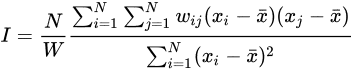
 


__Machine Learning and evaluation:__<br/>
Machine learning is a method of data analysis that allows computers to learn pattern and predict without being explicitly programmed. We consider four crucial features for price prediction here: the floor area, number of rooms, property type, and old-new status. Our project analyzed the performance of four highly cited and popular supervised regression models, namely Gradient Boosting Regressor (GB), Random Forest, K Nearest Neighbors (KNN), and Lasso. 

GB (Gradient Boosting Regressor) and RF (random forest regressor) are more advanced and complex models that belongs to Ensemble learning algorithms, which combine multiple models to improve their performance. Considering geolocation feature in our data, it’s reasonable to have KNN regressor, which uses ‘feature similarity’ to predict the values of any new data points. Lasso linear model is a regularization technique. By selecting popular models from different categories and complexity levels, we can compare and evaluate their performance. We split the data into training (70%) and test (20%), and train model on training dataset with GridSearchCV.

We plan to use three evaluation metrics for regression models: R-squared(coefficient of determination), MAE(mean absolute error), and MSE(mean squared error). Each metric captures different aspects of model performance, and we will compare multiple metrics to provide a more comprehensive evaluation. R-squared will be the main evaluation metric, as it is an intuitive way to compare and explain the performance of the models in general. R² = Explained variance / Total variance. Therefore, we can obtain a more complete understanding of how well each model is performing and choose the best one for predicting house prices across London's boroughs.





# Part 3 : Main Analysis with Code and Output

##  3.1 Data Preparation for Visualization!

 DATA
1. hp  - full set hp data --- for points clustering mapping
2. lb_map : polygon and census
3. hp3  :join points hp2019 and polygon
3. lb2 : polygon with group by value；.... --FOR polygon - relevant mapping
4. hp2019 - for ML
 

In [1]:
# Import required packages
import matplotlib as mpl
from matplotlib import colors

%matplotlib inline
mpl.rcParams['figure.figsize'] = (15, 10) #this increases the inline figure size to 15 tall x 10 wide

import seaborn as sns
import pandas as pd
import geopandas as gpd
import pysal 
import libpysal as lps 
import numpy as np
import mapclassify
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') # Change settings so that warnings are not displayed
sns.set(rc={'figure.figsize':(5,3)})

/opt/anaconda3/lib/python3.9/site-packages/pysal/explore/segregation/network/network.py:15: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  warn(


In [ ]:
# Load profiles and boroughs geojson and merge
profiles = pd.read_csv('lb_profiles.csv')
merge = pd.read_csv('merged.csv')

lb = gpd.read_file('london_boroughs.geojson')
lb_map = lb.merge(profiles)

# Load housing price data
hp = gpd.read_file('houses_lr.geojson')
hp2019 = hp[ hp['year'] == 2019.0]
hp2019['price'] = hp2019['price']
hp2019.crs = lb.crs

hp
merge.shape


In [3]:

lb.geometry.crs
hp2019.geometry.crs
# hp2019.head()

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: UK - Britain and UKCS 49°46'N to 61°01'N, 7°33'W to 3°33'E
- bounds: (-9.2, 49.75, 2.88, 61.14)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [4]:
hp3 = gpd.sjoin(hp2019,lb_map)  #join points and polygon

hp4 = hp3.groupby('NAME').agg({'price':['mean','median','sum'],'tfarea':'sum','NAME':'count','MedInc':'median', 'CrimeRate':'median', 'priceper':'median', 'GreenSpace':'median' })
hp4.columns = ['Mean_Price','Median_Price','Sum_Price','Sum_Floor_Area','House_Count','Med_Inc', 'Med_Crimerate','Med_priceper', 'Med_GreenSpace']

hp4 = hp4.reset_index()
hp4['Ave_Area_Price'] = hp4['Sum_Price']/hp4['Sum_Floor_Area']

# hp4.tail(3)   # we get COUNT, ave and mean price each region
# lb_map.info

In [5]:
# hp3.shape
# hp3.columns
# hp3.head()
# hp4.head()


In [6]:
lb2 = lb_map.merge(hp4)
lb2['House_Dens'] = lb2['House_Count']/(lb2['HECTARES']*.01)
lb2.head(3)

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,Code,NewCode,...,Median_Price,Sum_Price,Sum_Floor_Area,House_Count,Med_Inc,Med_Crimerate,Med_priceper,Med_GreenSpace,Ave_Area_Price,House_Dens
0,Kingston upon Thames,E09000021,3726.117,0.0,F,None,None,"MULTIPOLYGON (((516400.440 160208.103, 516406....",E09000021,E09000021,...,482500.0,7.013475e+08,117757.4421,1236,43940.0,58.5,5892.374517,36.4,5955.865748,33.171261
1,Croydon,E09000008,8649.441,0.0,F,None,None,"MULTIPOLYGON (((535007.659 159511.086, 535003....",E09000008,E09000008,...,411750.0,6.482111e+08,141678.2450,1464,37000.0,77.0,4687.500000,37.1,4575.233925,16.925949
2,Bromley,E09000006,15013.487,0.0,F,None,None,"MULTIPOLYGON (((540371.955 157536.846, 540359....",E09000006,E09000006,...,450000.0,1.446313e+09,288238.2850,2886,43060.0,64.1,5013.559555,57.8,5017.769128,19.222716


##  3.2  Choropleth mappings 

#### We performed spatial join to aggregate the house points to London Polygon for geovisulization. 

1. We choose to use 'Med_priceper' because without the influence of floor area, price per square foot provides better representation of price-level. !


2. Different classification schemes can yield varying results. For our choropleth mapping, we have chosen to use the Fisher-Jenks approach. Fisher-Jenks utilizes dynamic programming to group similar values into distinct classes or clusters(k). 


__Observations__： 

We see a clear trend of high prices, high density, and high crime rates in the city center, gradually decreasing as we move outward. Median income, however, exhibits a different pattern. Of particular interest is the polygon in the bottom right corner, which displays higher median income, lower prices, and crime rates, as well as low house density, making it an attractive location for living. 


If the prices are randomly distributed, there should not be clustering of similar values on the map below. So we proceed with Spatial Autocorrelation which is kind of lack of spatial randomness after this part.



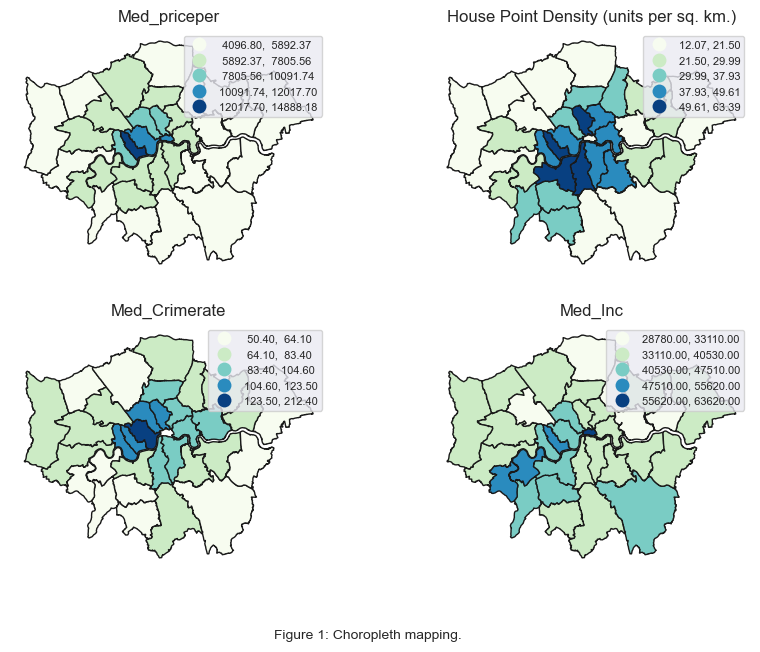

In [7]:
# choropleth 
f,ax = plt.subplots(2,2, figsize=(10,7))  # subplot_kw=dict(aspect='equal')
lb2.plot(column='Med_priceper' , ax=ax[0, 0], edgecolor='k',
        scheme="FisherJenks",  k=5, cmap='GnBu',legend=True, legend_kwds={'fontsize': 8}) 
ax[0, 0].set_title("Med_priceper")



lb2.plot(column='House_Dens',ax=ax[0, 1], legend=True, edgecolor='k',
         scheme='FisherJenks', k=5,cmap='GnBu', legend_kwds={'fontsize': 8})

ax[0, 1].set_title("House Point Density (units per sq. km.)")


lb2.plot(column='Med_Crimerate',ax=ax[1, 0], legend=True, edgecolor='k',
         scheme='FisherJenks', k=5,cmap='GnBu', legend_kwds={'fontsize': 8})
ax[1, 0].set_title("Med_Crimerate")


lb2.plot(column='Med_Inc',ax=ax[1, 1], legend=True, edgecolor='k',
         scheme='FisherJenks', k=5,cmap='GnBu', legend_kwds={'fontsize': 8});
ax[1, 1].set_title("Med_Inc") 

# lb2.plot(column='Med_GreenSpace',ax=ax[1, 1], legend=True, edgecolor='k',
#          scheme='FisherJenks', k=5,cmap='GnBu', legend_kwds={'fontsize': 8});
# ax[1, 1].set_title("Med_Inc") 

plt.figtext(0.5, 0.01, "Figure 1: Choropleth mapping.", ha="center", fontsize=10)

ax[0,0].axis('off')
ax[0,1].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off');




## 3.3  Spatial Autocorrelation

####  Is there a spatial clustering on price?  - Calculate Moran's I

Here, we use K-nearest neighbors (KNN) weights to define the neighbors for target feature. We set k=4, meaning we count the four nearest neighbors of each feature when calculating the spatial weights.

Then calculate the spatial lag of our variable -house price, which is the average value of the variable for the feature's neighbors, weighted by the spatial weights. Then, we row-standardize the data for adjusting the weights in a spatial weights matrix, which ensures that each feature's contribution to the spatial autocorrelation measure is equal regardless of the number of neighbors it has.

In [ ]:
wq =  lps.weights.KNN.from_dataframe(lb2,k=4)
wq.transform = 'r'


In [ ]:
# create a new column for the spatial lag
lb2['Med_priceper_lag'] = lps.weights.lag_spatial(wq, lb2['Med_priceper'])
lb2['Median_Price_lag'] = lps.weights.lag_spatial(wq, lb2['Median_Price'])



In [ ]:
# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation, plot_local_autocorrelation
# from pysal.viz.splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation

y = lb2.Med_priceper
moran = Moran(y, wq)
moran.I

In [11]:
# fig, ax = moran_scatterplot(moran, aspect_equal=True)


## Local Spatial Autocorrelation?  - use LISA


In [12]:
# calculate local moran values
lisa = esda.moran.Moran_Local(y, wq)

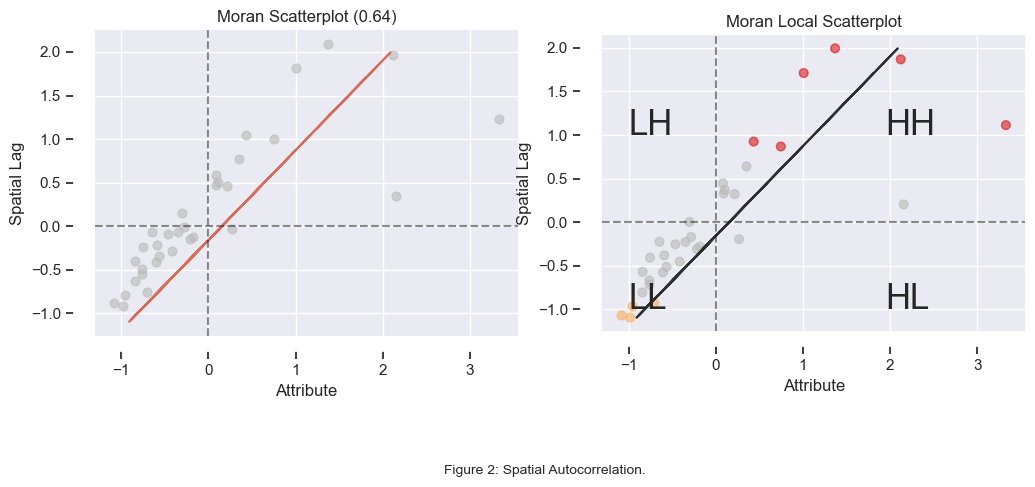

In [13]:


# create the 1x2 subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))


moran_scatterplot(moran, ax=ax[0], aspect_equal=True)

moran_scatterplot(lisa, ax=ax[1], p=0.05);

plt.text(1.95, 1, "HH", fontsize=25)
plt.text(1.95, -1, "HL", fontsize=25)
plt.text(-1, 1, "LH", fontsize=25)
plt.text(-1, -1, "LL", fontsize=25);

plt.figtext(0.5, 0.01, "Figure 2: Spatial Autocorrelation.", ha="center", fontsize=10);


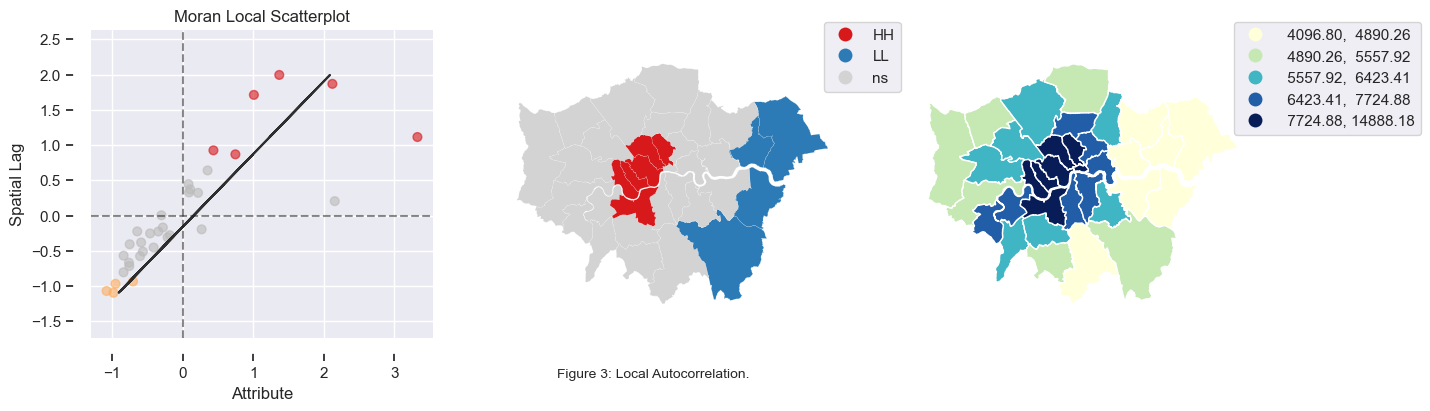

In [14]:
import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
from libpysal import examples
import geopandas as gpd
from esda.moran import Moran_Local
from splot.esda import plot_local_autocorrelation


fig = plot_local_autocorrelation(lisa, lb2, 'Med_priceper', p=0.05)
#                                  region_column='Dprtmnt',
#                                  mask=['Ain'], quadrant=1)
plt.figtext(0.5, 0.01, "Figure 3: Local Autocorrelation.", ha="center", fontsize=10);
# plt.show()；


# plot_moran(moran, figsize=(10,4)); 


### Spatial Autocorelation

1. We can distinguish local spatial autocorrelation in High-High, Low-Low, High-Low, Low-High : describe similarities or dissimilarities between a polygon with its neighbors. 

2. We compared Price and Spatial Lag price in the following plot.



In [ ]:
# df['lag_median_price'] = ylag
f,ax = plt.subplots(1,2,figsize=(10,4), subplot_kw=dict(aspect='equal'))
lb2.plot(column='Med_priceper', ax=ax[0], edgecolor='k',
        scheme="FisherJenks",  k=5, cmap='GnBu')  #,legend=True
# Med_priceper_lag   Med_priceper
#  quantiles


ax[0].set_title("Price")
lb2.plot(column='Med_priceper', ax=ax[1], edgecolor='k',
        scheme='FisherJenks', cmap='GnBu', k=5)  #, legend=True



# ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial Lag Price")
ax[0].axis('off')
ax[1].axis('off')
plt.figtext(0.5, 0.01, "Figure 4: Compare Price and Lag_Price.", ha="center", fontsize=10);
plt.show();



## 3.4 Interactive Points clustering on Map


Since our main target is house price. Here look at a time series of house price(per square foot) for all regions where data is available using an interactive points map. We map the points from 2016-2019 in our data so we can observe the changes.


In [ ]:
bn = {'init': 'epsg:27700'}
wgs84 = {'init': 'epsg:4326'}

hp = hp.to_crs(wgs84)

hp['lon'] = hp['geometry'].apply(lambda x: x.coords[0][0])
hp['lat'] = hp['geometry'].apply(lambda x: x.coords[0][1])



import plotly.express as px

mapbox_access_token =  'pk.eyJ1Ijoibmljb2xlLXJvd2UiLCJhIjoiY2xmNm9ubWZ4MG43dTQxbm54ZzExb3c5eCJ9.IlwTtbcPoKIkY8GlUJa6GA'
px.set_mapbox_access_token(mapbox_access_token)

hp['year_int'] = hp['year'].astype(int)
hp_sorted = hp[hp['year_int']>2015].sort_values('year_int')  


In [39]:

# fig = px.scatter_mapbox(data_frame=hp_sorted, lat='lat', lon='lon', color='priceper',
#   opacity=0.5, 
#   animation_frame = 'year', 
#   hover_data=["propertytype","numberrooms"], 
#   size_max=10,

#   zoom=9)
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},  # remove the white gutter between the frame and map
#         # hover appearance
#         hoverlabel=dict( 
#         bgcolor="white",     # white background
#         font_size=16,        # label font size
#         font_family="Inter"), # label font
     
# )



# 3.5 ML

__Prior to utilizing machine learning algorithms, we generate a pairplot and correlation matrix to gain insight into the relationships between the variables in the dataset.__

In [ ]:
# create additional columns filled with 0 values
hp2019["isOutlierPrice"] = 0 

meanPrice = hp2019['price'].mean()
stdDevPrice = hp2019['price'].std()

#mark outliers as 
hp2019['isOutlierPrice'] = np.where(abs(hp2019['price'] - meanPrice) > 5 * stdDevPrice, 1, 0)
# housing['isOutlierDistance'] = np.where(abs(housing['Distance'] - meanDistance) > 5 * stdDevDistance, 1, 0)



hp2019['isOutlierPrice'].value_counts() # delete 210 outliers

hp2019= hp2019[hp2019['isOutlierPrice'] != 1]   # 42914 ros -210 rows, 42704

In [ ]:
hp2019_plot= hp2019.drop(['pcd', 'pcd2', 'priceper','doterm','dointr','postcode','dateoftransfer','categorytype', 'recordstatus', 'year',  'geometry', 'isOutlierPrice'],  axis=1)
hp2019_plot.head(3)



In [ ]:

corr = hp2019_plot.corr()

# Create a scatterplot matrix
sns.pairplot(hp2019_plot,vars=['price', 'tfarea','numberrooms'], hue='propertytype')


# Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix');
plt.figtext(0.5, 0.01, "Figure 6: Matrix and heapmap", ha="center", fontsize=10);


# Data prepare for ML



__After checking columns in our dataset data separated into numerical and categorical variables, we selected most relevant variables to predict price__

* tfarea, 
* num of rooms. 
* propertype and 
* oldnew 

__steps of data processing__
* check NA and drop outliers
* select target variable 
* transfer catagorical into numerical feature
* Data standardization
* Split data for training and testing


In [ ]:


hp2019ML=hp2019.drop(['recordstatus', 'categorytype','duration', 'year','doterm', 'pcd2','pcd', 'isOutlierPrice', 
                      'dointr','postcode','priceper', 'dateoftransfer' ], axis=1)



In [ ]:
#CHANGE TO LAT/LON

import pandas as pd
from shapely.geometry import Point
from pyproj import Proj, transform


hp2019ML[['lat', 'lon']] = hp2019ML.apply(lambda p: (p.geometry.y, p.geometry.x), axis=1, result_type='expand')


hp2019ML=hp2019ML.drop(['geometry'],axis=1)
hp2019ML.head()


In [ ]:
# We use dummy variable as it takes hours for my pc to train data if we go oneHotencoder and still not working

hp2019ML['propertytype'] = pd.factorize(hp2019ML['propertytype'])[0]
hp2019ML['oldnew'] = pd.factorize(hp2019ML['oldnew'])[0]
hp2019ML['numberrooms'] = pd.factorize(hp2019ML['numberrooms'])[0]


In [ ]:
price = hp2019ML['price']/1000.0   # divided by 1000 as large values of data can lead to rounding errors:
X= hp2019ML.drop('price', axis=1) 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.3, random_state=42)



In [ ]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()

# x_scaler is created to scale variable `east`, `north` and `fl_area`. </br>
# To actually calibrate the scaler,  the `fit` method is used:

x_scaler.fit(hp2019ML[['lat','lon','tfarea','propertytype','oldnew','numberrooms' ]])

# To actually transform some data to $z$-scores the `transform` method is used:
X = x_scaler.transform(hp2019ML[['lat','lon','tfarea','propertytype','oldnew', 'numberrooms']])

print(X[:6,:])

## ML

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor as NN  
from sklearn.ensemble import RandomForestRegressor as RF


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer  #prediction score, MAE
mae = make_scorer(mean_absolute_error, greater_is_better=False)  #The greater_is_better=False argument is used to specify that in this case lower scores correspond to better models.


### MODEL1: KNN

In [ ]:
# KNN
opt_nn = GridSearchCV(
    estimator = NN(),
    cv=5,
    param_grid = {
        'n_neighbors':range(1,35),
        'weights':['uniform','distance'],
        'p':[1,2]})     #scoring = mae,

opt_nn.fit(X_train, y_train)


### MODEL2: Random Forest

In [ ]:
# RF
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [1,2,3,4],
}



rf = RF()
# Instantiate the grid search model
opt_rf = GridSearchCV(estimator = rf, param_grid = parameters, 
                          cv = 5, n_jobs = -1, verbose = 2)

opt_rf.fit(X_train, y_train)



### MODEL3:  GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


gb_parameters = {
    'n_estimators': [50, 100, 300],
    'max_depth': [2,4,9],
}


gbmodel = GradientBoostingRegressor()
# Instantiate the grid search model
opt_gb = GridSearchCV(estimator = gbmodel, 
                      param_grid = gb_parameters, 
                      cv = 5, 
                      n_jobs = -1, verbose = 2)

opt_gb.fit(X_train, y_train)

gb_preds= opt_gb.predict(X_test) 

### MODEL4:  Lasso


In [ ]:
from sklearn.linear_model import Lasso

range1= [0.001, 0.01, 0.05, 0.1, 0.5,1.0]
params_grid= {'alpha': range1}
lasso_gcv= GridSearchCV(estimator= Lasso(), 
                        param_grid= params_grid,
                        cv= 5,
#                         scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

lasso_gcv.fit(X_train, y_train)



In [ ]:
LASSO_preds= lasso_gcv.predict(X_test)
KNN_preds_gridcv = opt_nn.predict(X_test)
RF_preds_gridcv = opt_rf.predict(X_test)

# evaluate_preds(y_test, gs_y_preds)

print(f'KNN_best param: {opt_nn.best_params_}')
print(f'RF_ best param: {opt_rf.best_params_}')

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Evaluate model using evaluation functions
# print("Regression metrics with KNN_Gridsearchcv on the test set")
# print(f"R2 score: {r2_score(y_test, KNN_preds_gridcv)}")
# print(f"MAE: {mean_absolute_error(y_test, KNN_preds_gridcv)}")
# print(f"MSE: {mean_squared_error(y_test, KNN_preds_gridcv)}")


knnR2= r2_score(y_test, KNN_preds_gridcv)
knnMAE= mean_absolute_error(y_test, KNN_preds_gridcv)
knnMSE= mean_squared_error(y_test, KNN_preds_gridcv)


rfR2= r2_score(y_test, RF_preds_gridcv)
rfMAE= mean_absolute_error(y_test, RF_preds_gridcv)
rfMSE= mean_squared_error(y_test, RF_preds_gridcv)

lsR2= r2_score(y_test, LASSO_preds)
lsMAE= mean_absolute_error(y_test, LASSO_preds)
lsMSE= mean_squared_error(y_test, LASSO_preds)


gbR2= r2_score(y_test, gb_preds)
gbMAE= mean_absolute_error(y_test, gb_preds)
gbMSE= mean_squared_error(y_test, gb_preds)

### ML summary


In [ ]:

knnscore = [knnR2, knnMAE, knnMSE]
rfscore = [rfR2, rfMAE, rfMSE]
gbscore = [gbR2, gbMAE, gbMSE]
lsscore = [lsR2, lsMAE, lsMSE]

# Create a Pandas Series from the list and assign the name "age" to the column
knns = pd.Series(knnscore, name="KNN MODEL")
rfs = pd.Series(rfscore, name="RF MODEL")
gbs = pd.Series(gbscore, name="GB MODEL")
lss = pd.Series(lsscore, name="Lasso MODEL")


name = ['R^2', 'MAE', 'MSE']
Metrics = pd.Series(name, name="name")
# Combine the Series into a dataframe
df = pd.concat([Metrics, knns, rfs, gbs, lss, ], axis=1)

# df = df.set_index('name')

def display_options():
     
    display = pd.options.display
#     display.max_columns = 5
#     display.max_rows = 4
    display.max_colwidth = 1000
    display.width = None
    return None
 
# display_options()
# display(df)





We tried 4 model
1. XBGOOST is suprisingly good with score: 0.86
2. Randome forest: 0.62
3. KNN: 0.6
4. LASSO_preds: 0.5

In [34]:
def make_pretty(styler):
    styler.background_gradient(axis=None, vmin=1, vmax=5, cmap="YlGnBu")
    styler.set_table_styles([{'selector': 'table', 'props': [('max-width', '100%'), ('font-size', '20pt')]}])
    return styler

# df.style.pipe(make_pretty)


def display_options():
    display = pd.options.display
    display.max_colwidth = 1000
    display.width = None
    return None
 
caption = "Table 1: ML  Evaluation Metrics"
display_options()
# display(df.style.pipe(make_pretty)).set_caption(caption)

styled_df = df.style.pipe(make_pretty)
styled_df_with_caption = styled_df.set_caption(caption)
display(styled_df_with_caption)



,name,KNN MODEL,RF MODEL,GB MODEL,Lasso MODEL
0,R^2,0.609594,0.621362,0.863559,0.578705
1,MAE,142.885202,151.611936,84.906722,165.859982
2,MSE,66935.845780,64918.196740,23393.107823,72231.773460


In [35]:
difference = y_test-gb_preds

df1_GB = pd.DataFrame({'y_pred': gb_preds, 'y_test': y_test, 'difference': difference})

# Print the resulting DataFrame
print(df1_GB.head(3))

            y_pred   y_test  difference
63569   381.289314  405.000   23.710686
351472  442.584311  495.000   52.415689
41160   204.551122  243.875   39.323878


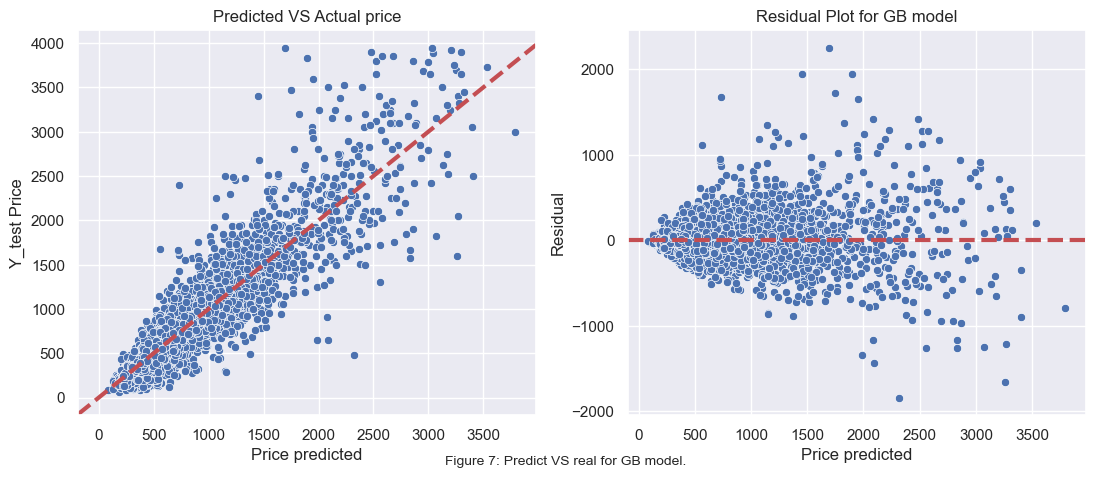

In [36]:
f,ax = plt.subplots(1,2, figsize=(13, 5))

sns.scatterplot(x=gb_preds, y=y_test, ax=ax[0])
ax[0].axline((0, 0), (1, 1), color='r',  linestyle='--', linewidth=3)
# ax[1].axhline(y=x, color='r', llinewidth=4, 
ax[0].set_title("Predicted VS Actual price")
ax[0].set(xlabel="Price predicted", ylabel="Y_test Price"); 


sns.scatterplot(x=gb_preds, y=difference,ax=ax[1] )
ax[1].axhline(y=0, color='r', linestyle='--', linewidth=3)

# plt.set_title("GB ")
ax[1].set_title("Residual Plot for GB model")
ax[1].set(xlabel="Price predicted", ylabel="Residual"); 

plt.figtext(0.5, 0.01, "Figure 7: Predict VS real for GB model.", ha="center", fontsize=10);



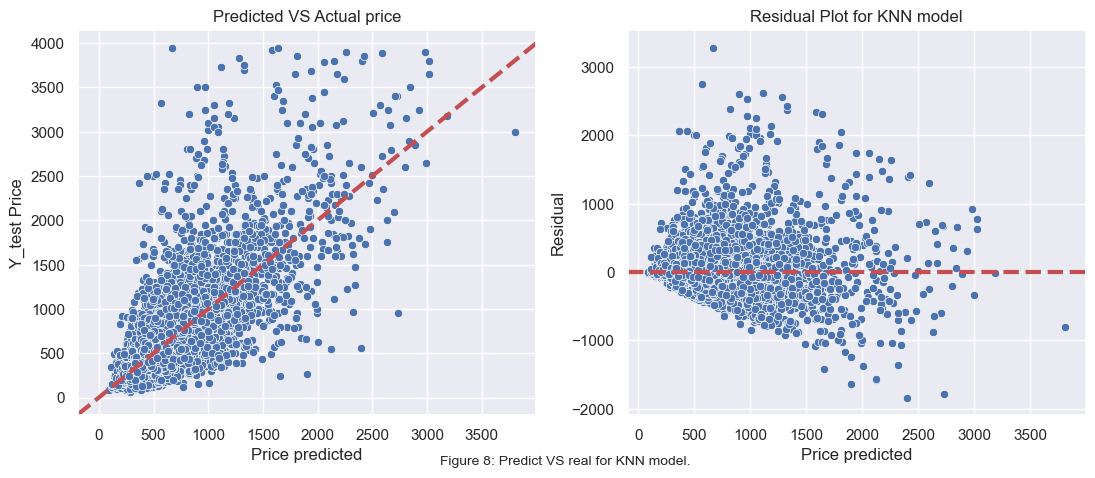

In [37]:
f,ax = plt.subplots(1,2, figsize=(13, 5))
#RF_preds_gridcv
sns.scatterplot(x= KNN_preds_gridcv, y=y_test, ax=ax[0])
ax[0].set_title("Predicted VS Actual price")
ax[0].set(xlabel="Price predicted", ylabel="Y_test Price"); 
ax[0].axline((0, 0), (1, 1), color='r',  linestyle='--', linewidth=3)

sns.scatterplot(x=KNN_preds_gridcv, y=y_test-KNN_preds_gridcv,ax=ax[1] )
ax[1].axhline(y=0, color='r', linestyle='--', linewidth=3)

# plt.set_title("GB ")
ax[1].set_title("Residual Plot for KNN model")
ax[1].set(xlabel="Price predicted", ylabel="Residual"); 


plt.figtext(0.5, 0.01, "Figure 8: Predict VS real for KNN model.", ha="center", fontsize=10);


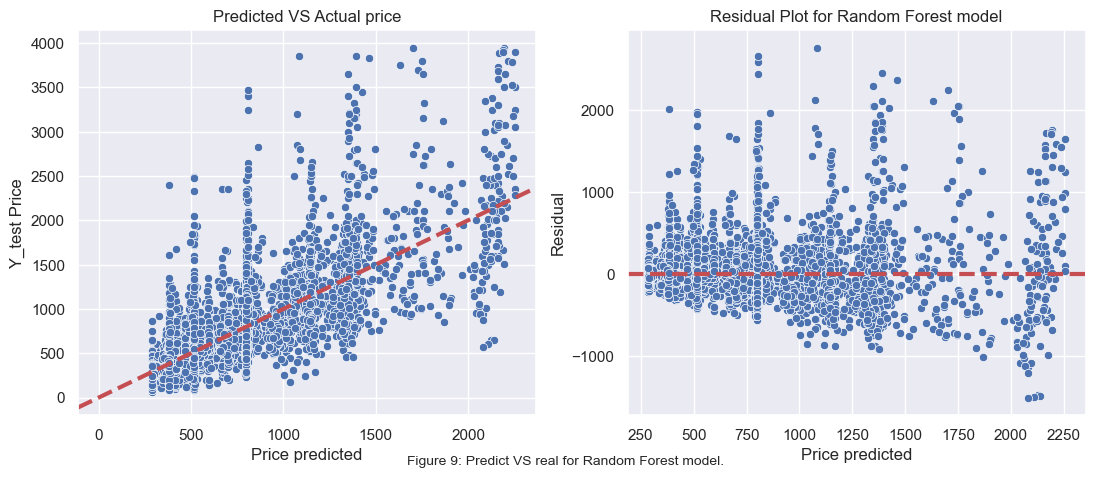

In [38]:
f,ax = plt.subplots(1,2, figsize=(13, 5))

sns.scatterplot(x= RF_preds_gridcv, y=y_test, ax=ax[0])
ax[0].set_title("Predicted VS Actual price")
ax[0].set(xlabel="Price predicted", ylabel="Y_test Price"); 
ax[0].axline((0, 0), (1, 1), color='r',  linestyle='--', linewidth=3)

sns.scatterplot(x=RF_preds_gridcv, y=y_test-RF_preds_gridcv,ax=ax[1] )
ax[1].axhline(y=0, color='r', linestyle='--', linewidth=3)

# plt.set_title("GB ")
ax[1].set_title("Residual Plot for Random Forest model")
ax[1].set(xlabel="Price predicted", ylabel="Residual"); 


plt.figtext(0.5, 0.01, "Figure 9: Predict VS real for Random Forest model.", ha="center", fontsize=10);


__Residual = Observed – Predicted. Positive values for the residual (on the y-axis) mean the prediction was too low, and negative values mean the prediction was too high; 0 means the guess was exactly correct.__



## Part4: Results and significance.

From choropleth mapping in Figure 1, we observed a clear trend of high prices, high density, and high crime rates in the centre of the city, with these values gradually decreasing as we move outward. Median income, however, exhibits a different pattern. Of particular interest is the polygon in the bottom right corner, which displays higher median income, lower prices, and crime rates, as well as low house density, making it an attractive location for living. 
Then we proceed with Spatial Autocorrelation analysis to investigate further spatial pattern. The calculation of Moran's I value for the house price data shows a moderate positive spatial autocorrelation, with a value of approximately 0.642. Additionally, Local Indicators of Spatial Association (LISAs) tell us whether the local association between polygons and its neighbors is positive/similar (HH/LL) or negative/ dissimilar (HL/LH). This suggests a spatial clustering of similar house prices in the study area. From Figure 2, we can see most of them are in HH and LL area. As shown in Figure 3 more specifically, there are about 11 locations significant when setting p=0.05. 


The features we have chosen for house price prediction with machine learning includes total floor area, number of rooms, property type, and old-new status. To do this, we utilized four different supervised machine learning regression models, including GB Model, Random Forest, KNN, and LASSO, and compared their evaluation metrics. During machine learning process, we used GridSearch-CV to optimize hyperparameters in each model. The evaluation results of each of the four machine learning models on the test set are obtained by specifying three evaluation metrics, R2, MAE, and MSE, under the optimal parameters selected based on grid search.


Table 1 presents the ML evaluation metrics, allowing us to easily discern the performance of the various models. It is apparent that the GB Model outperformed the others, achieving an accuracy score (R^2) of 0.86, followed by Random Forest at 0.62, KNN at 0.6, and LASSO at 0.57. This indicates that the GB Model was the most effective at predicting house prices based on the selected features for our data. In figure 7-9, we compared price predicted and real price in test data and calculated residuals for three main models. Residual values (Observed – Predicted) can capture the difference. It’s evident that GB model is performing very well for most of the regular data, except for data points with very high house prices. I assume those points are influenced more by social and environmental factors, because in this project here we only have features about location and house itself. That’s what we are going to do next. 


For further analysis we can use hedonic home price model to better understand the factors that influence housing prices, including both internal characteristics of the house and external neighbourhood amenities and public services, such as crime exposure. Our findings suggest that spatial pattern plays an important role in housing prices, with systematic spatial patterns emerging from individual real estate transactions.


Overall, the results of our study have important implications for understanding the factors that influence house prices in our study area. By identifying dynamic features that are associated with house prices, we aim to help decision making relevant with housing affordability, investment, and urban planning. Furthermore, our findings highlight the importance of considering spatial autocorrelation in house price data, as this can help identify areas that are particularly desirable or undesirable for living based on the characteristics of their neighbouring regions.
